# Decision tree regression

In [1]:
# importing libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# importing dataset

dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:,1:-1].values
y= dataset.iloc[:,-1].values

In [3]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [4]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [5]:
# Training the Decision Tree Regression model on the whole dataset

from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X,y)

DecisionTreeRegressor()

In [6]:
# Predicting the new results

regressor.predict([[6.5]])

array([150000.])

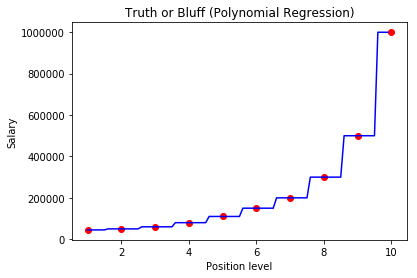

In [7]:
# Visualising the Decision Tree Regression results (higher resolution)

X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Decision Tree Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()